# Data Science Workflow
- Plan
- Acquire
- Prepare Data (Data Wrangling)
- Explore
- Model
- Delivery/Present

In [20]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import numpy as np
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error


In [246]:
# Acquire
df = pd.read_csv("lemonade.csv")

In [247]:
# Prepare
df["Revenue"] = df.Price * df.Sales
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(df['Date']) 
df = df.drop("Date", 1) # drop the old Date column
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,Revenue
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,5.0
2017-01-02,Monday,28.9,1.33,15,0.5,13,6.5
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,7.5
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,8.5
2017-01-05,Thursday,42.4,1.00,33,0.5,18,9.0


In [248]:
# Does the day of the week have any bearing on sales?
df.groupby("Day").Sales.agg("mean") # Grouping by day, show average sale per day

Day
Friday       25.384615
Monday       25.461538
Saturday     25.346154
Sunday       24.830189
Thursday     25.673077
Tuesday      25.134615
Wednesday    25.442308
Name: Sales, dtype: float64

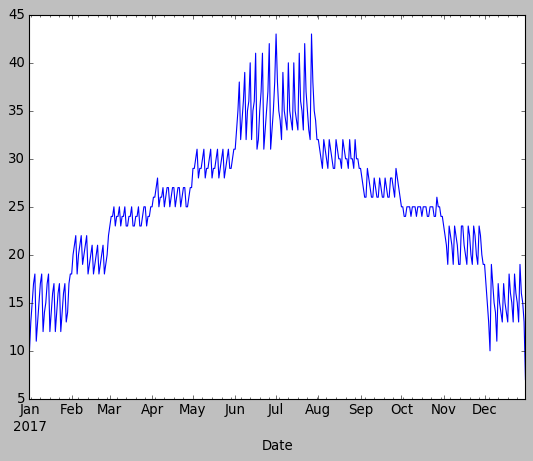

In [261]:
# Since we have a datetime index, df.Sales.plot()
df.Sales.plot()

In [250]:
# df["Month_Number"] = df.index.month # Get the month from the datetime index
# df["Month_Name"] = df.index.month_name()
# df["Month"] = df["Month_Number"].astype("str") + df["Month_Name"] do this
df["Month"] = df.index.strftime("%m-%b") # or this
df.groupby("Month").Sales.mean()

Month
01-Jan    14.903226
02-Feb    19.892857
03-Mar    23.935484
04-Apr    26.200000
05-May    29.516129
06-Jun    35.200000
07-Jul    35.903226
08-Aug    30.354839
09-Sep    27.066667
10-Oct    24.677419
11-Nov    21.066667
12-Dec    14.903226
Name: Sales, dtype: float64

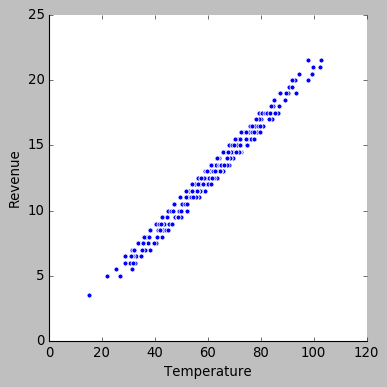

In [23]:
# Explore how Temperature relates to Revenue
sns.relplot(x='Temperature', y='Revenue', data=df)

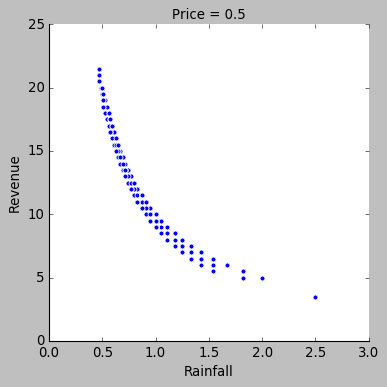

In [24]:
sns.relplot(x='Rainfall', y='Revenue', col='Price', data=df) # Looks like Rainfall is exponential, l

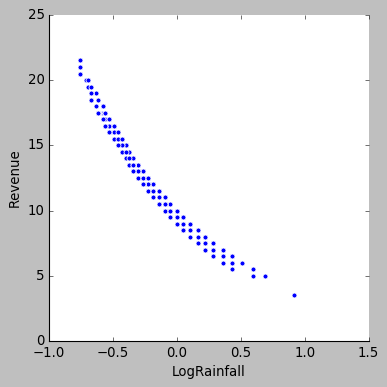

In [140]:
df["LogRainfall"] = df["Rainfall"].apply(np.log)
sns.relplot(x='LogRainfall', y='Revenue', data=df) # Relationship between LogRainfall and revenue is a bit more linear

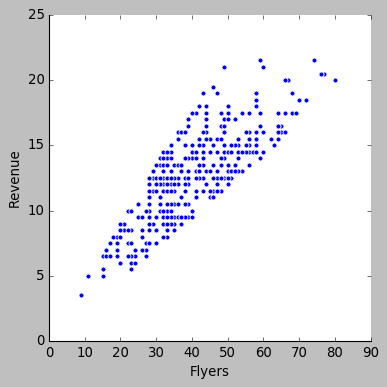

In [26]:
sns.relplot(x='Flyers', y='Revenue', data=df)

In [208]:
df.corr()

,Temperature,Rainfall,Flyers,Price,Sales,Revenue,LogRainfall
Temperature,1.000000,-0.902859,0.797719,NaN,0.989832,0.989832,-0.963550
Rainfall,-0.902859,1.000000,-0.747389,NaN,-0.909214,-0.909214,0.977162
Flyers,0.797719,-0.747389,1.000000,NaN,0.805183,0.805183,-0.793275
Price,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,0.989832,-0.909214,0.805183,NaN,1.000000,1.000000,-0.972083
Revenue,0.989832,-0.909214,0.805183,NaN,1.000000,1.000000,-0.972083
LogRainfall,-0.963550,0.977162,-0.793275,NaN,-0.972083,-0.972083,1.000000


In [211]:
df.corr().Temperature.sort_values()

LogRainfall   -0.963550
Rainfall      -0.902859
Flyers         0.797719
Sales          0.989832
Revenue        0.989832
Temperature    1.000000
Price               NaN
Name: Temperature, dtype: float64

In [213]:
df.corr().Revenue.sort_values()

LogRainfall   -0.972083
Rainfall      -0.909214
Flyers         0.805183
Temperature    0.989832
Sales          1.000000
Revenue        1.000000
Price               NaN
Name: Revenue, dtype: float64

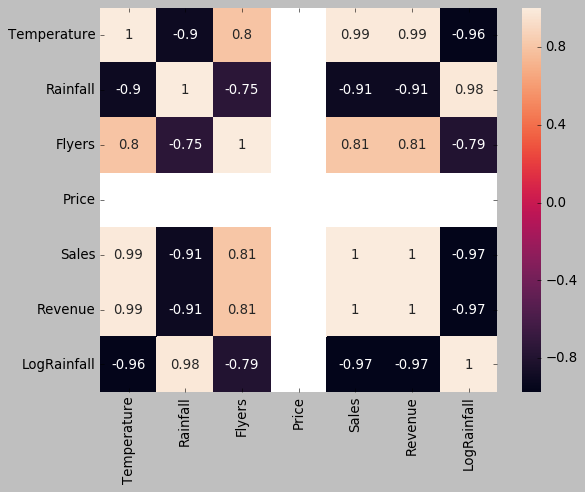

In [214]:
sns.heatmap(df.corr(), annot=True)

In [207]:
# Setup X and y values
# X = df.drop(["Revenue", "Day", "Price", "Sales", "Rainfall"], axis=1) # Drop extra columns
X = df[["Temperature", "Flyers", "LogRainfall"]]
y = df[["Revenue"]]

In [263]:
# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=0)

pandas.core.frame.DataFrame

In [45]:
train = pd.concat([X_train, y_train], axis=1)
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)

Train columns:  ['Temperature', 'Flyers', 'LogRainfall', 'Revenue']
Train dimensions (rows, columns): (292, 4)


In [46]:
test = pd.concat([X_test, y_test], axis=1)
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Test columns:  ['Temperature', 'Flyers', 'LogRainfall', 'Revenue']
Test dimensions (rows, columns): (73, 4)


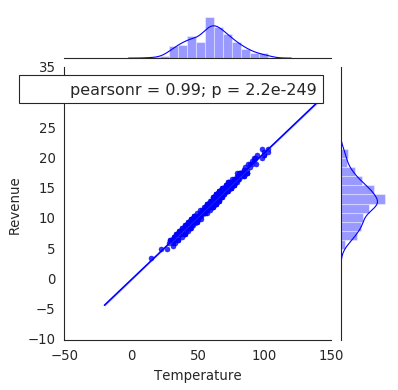

In [49]:
with sns.axes_style('white'):
    j = sns.jointplot("Temperature", "Revenue", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

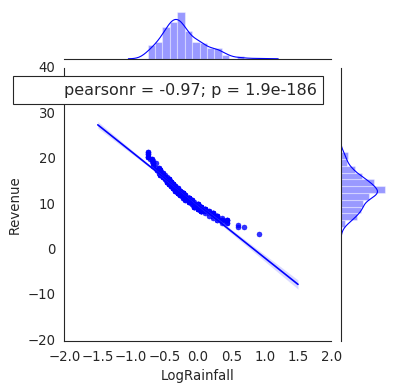

In [50]:
with sns.axes_style('white'):
    j = sns.jointplot("LogRainfall", "Revenue", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

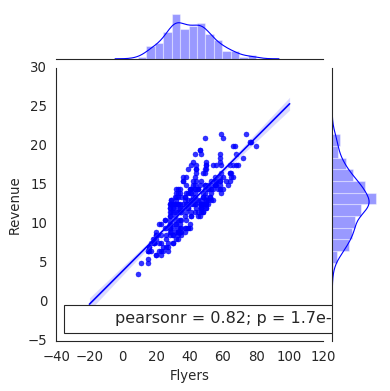

In [51]:
with sns.axes_style('white'):
    j = sns.jointplot("Flyers", "Revenue", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

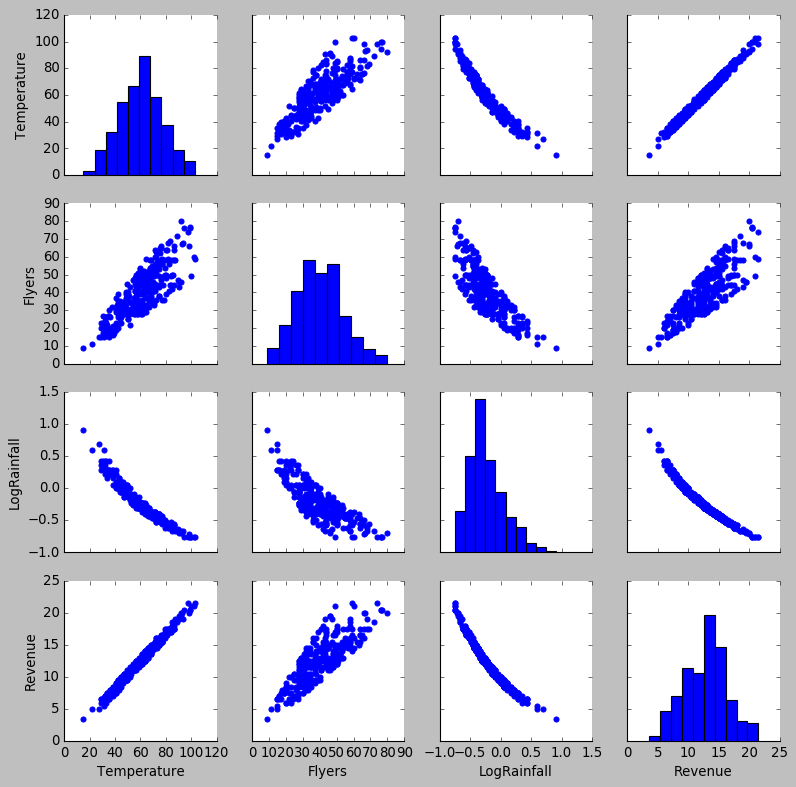

In [47]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

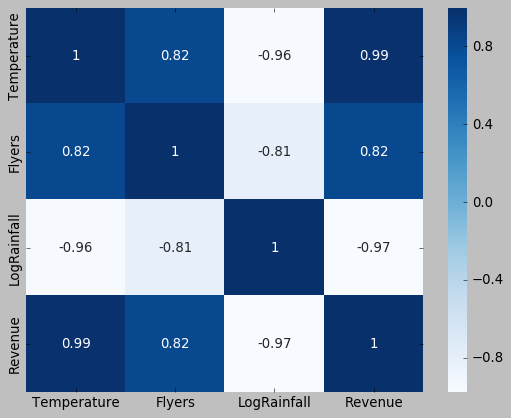

In [48]:
sns.heatmap(train.corr(), cmap='Blues', annot=True)


In [108]:
pearsonr(X_train[['Temperature']], y_train)


(array([0.99010556]), array([2.20494339e-249]))

In [109]:
[[column, pearsonr(train[column], train.Revenue)] for column in X_train] 


[['Temperature', (0.9901055633232857, 2.2049433851811432e-249)],
 ['Flyers', (0.8207997611888267, 1.688589103066614e-72)],
 ['LogRainfall', (-0.9728935408979181, 1.852683593075957e-186)]]

In [110]:
column_names = X_train.columns
r_and_p_values = [pearsonr(X_train[col], y_train.Revenue) for col in column_names]

exam_final_corr_dict = dict(zip(column_names, r_and_p_values))
exam_final_corr_dict

{'Temperature': (0.9901055633232857, 2.2049433851811432e-249),
 'Flyers': (0.8207997611888267, 1.688589103066614e-72),
 'LogRainfall': (-0.9728935408979181, 1.852683593075957e-186)}

In [111]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.145e+04
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:54:31   Log-Likelihood:                -201.25
No. Observations:                 292   AIC:                             408.5
Df Residuals:                     289   BIC:                             419.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Temperature     0.2006      0.003     80.167      0.000       0.196       0.205
Flyers          0.0085      0.004      2.332      0.020       0.001       0.016
LogRainfall    -0.4866      0.125     -3.892      0.000      -0.733      -0.241
==============================================================================
Omnibus:                      281.703   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.102
Skew:                           0.039   Prob(JB):                     4.31e-05
Kurtosis:                       1.717   Cond. No.                         334.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Single Variable Model w/ Flyers
## (probably not the best indicator, since the coefficient of correlation is so low.)

In [199]:
lm0 = LinearRegression()
lm0.fit(X_train[["Flyers"]], y_train)
lm0_y_intercept = lm0.intercept_
print("1m0 Y intercept:", lm0_y_intercept)

lm0_coefficients = lm0.coef_
print("1m0 Coefficients:", lm0_coefficients)
print()
# Given the intercept and the coefficients, we can write the regression function.

print('Univariate - Revenue = b + m * Flyers')
print('    y-intercept (b): %.2f' % lm0_y_intercept)
print('    coefficient (m): %.2f' % lm0_coefficients[0])
print()

# Now that we have a model, we can use the model to make predictions. We'll start by using our model to predict based on the test data set.
y_pred_lm0 = lm0.predict(X_train[['Flyers']])

# Determine the error
mse_lm0 = mean_squared_error(y_train, y_pred_lm0)
print("lm0\n  mse: {:.3}".format(mse_lm1)) 
print()

r2_lm0 = r2_score(y_train, y_pred_lm0)
print('  {:.2%} of the variance in the Revenue can be explained by the number of Flyers on that day'.format(r2_lm0))

1m0 Y intercept: [3.96535451]
1m0 Coefficients: [[0.21456762]]

Univariate - Revenue = b + m * Flyers
    y-intercept (b): 3.97
    coefficient (m): 0.21

lm0
  mse: 0.249

  67.37% of the variance in the Revenue can be explained by the number of Flyers on that day


## Single Variable Model w/ Temperature

The single variable with the highest R value and lowest P value is Temperature. Let's make a one variable linear model

In [112]:
# Create linear regression objects
lm1 = LinearRegression()
print(lm1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [113]:
lm1.fit(X_train[['Temperature']], y_train)
print(lm1)

lm1_y_intercept = lm1.intercept_
print("1ml Y intercept:", lm1_y_intercept)

lm1_coefficients = lm1.coef_
print("1ml Coefficients:", lm1_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
1ml Y intercept: [-0.11874543]
1ml Coefficients: [[0.21030836]]


In [181]:
# Given the intercept and the coefficients, we can write the regression function.

print('Univariate - final_exam = b + m * Temperature')
print('    y-intercept (b): %.2f' % lm1_y_intercept)
print('    coefficient (m): %.2f' % lm1_coefficients[0])
print()

Univariate - final_exam = b + m * Temperature
    y-intercept (b): 9.95
    coefficient (m): -11.71



In [115]:
# Now that we have a model, we can use the model to make predictions. We'll start by using our model to predict based on the test data set.

y_pred_lm1 = lm1.predict(X_train[['Temperature']])

In [116]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("lm1\n  mse: {:.3}".format(mse_lm1)) 

lm1
  mse: 0.249


In [117]:
r2_lm1 = r2_score(y_train, y_pred_lm1)

print('  {:.2%} of the variance in the Revenue can be explained by the Temperature on that day'.format(r2_lm1))

  98.03% of the variance in the Revenue can be explained by the Temperature on that day


## Model with 2 variables


In [118]:
lm2 = LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [119]:
lm2.fit(X_train[['Temperature', 'LogRainfall']], y_train)
print(lm2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [121]:
lm2_y_intercept = lm2.intercept_
print("Y-intercept:", lm2_y_intercept)

lm2_coefficients = lm2.coef_
print("Coefficients:", lm2_coefficients)

Y-intercept: [2.3784603]
Coefficients: [[ 0.15733542 -3.1132541 ]]


In [123]:
print('Multivariate - final_exam = b + m1 * Temperature + m2 * LogRainfall')
print('    y-intercept  (b): %.2f' % lm2_y_intercept)
print('    coefficient (m1): %.2f' % lm2_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm2_coefficients[0][1])

Multivariate - final_exam = b + m1 * Temperature + m2 * LogRainfall
    y-intercept  (b): 2.38
    coefficient (m1): 0.16
    coefficient (m2): -3.11


In [128]:
y_pred_lm2 = lm2.predict(X_train.drop(columns=['Flyers']))

In [129]:
mse_lm2 = mean_squared_error(y_train, y_pred_lm2)
print("lm2\n  mse: {:.3}".format(mse_lm2)) 

lm2
  mse: 0.189


In [131]:
r2_lm2 = r2_score(y_train, y_pred_lm2)
print('  {:.2%} of the variance in the Revenue can be explained by the Temperature and LogRainfall.'.format(r2_lm2))

  98.50% of the variance in the Revenue can be explained by the Temperature and LogRainfall.


## Compare both models

Text(0.5, 1.0, 'Predicted vs Actual Final Grade')

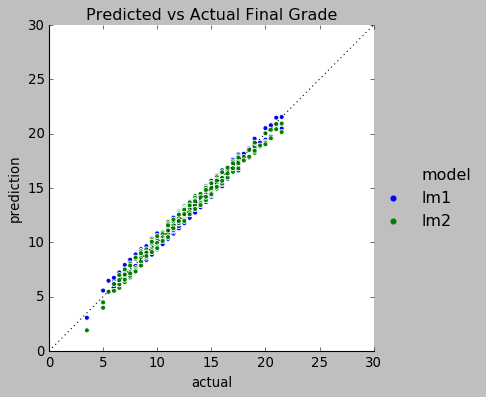

In [138]:
# the predictions are a 1 x 83 two dimensional matrix, but we want just
# a single array of predictions. We can use the .ravel method to achieve
# this.

pd.DataFrame({'actual': y_train.Revenue,
              'lm1': y_pred_lm1.ravel(),
              'lm2': y_pred_lm2.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([0, 30], [0, 30], c='black', ls=':')
plt.ylim(0, 30)
plt.xlim(0, 30)
plt.title('Predicted vs Actual Final Grade')

# Single Variable Model with only LogRainfall

In [173]:
# Create linear regression objects
lm3 = LinearRegression()

lm3.fit(X_train[['LogRainfall']], y_train)
print(lm3)

lm3_y_intercept = lm3.intercept_
print("1m3 Y intercept:", lm1_y_intercept)

lm3_coefficients = lm3.coef_
print("1m3 Coefficients:", lm1_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
1m3 Y intercept: [9.94505793]
1m3 Coefficients: [[-11.71147883]]


In [182]:
# Given the intercept and the coefficients, we can write the regression function.

print('Univariate is Y = b + m * LogRainfall')
print('    y-intercept (b): %.2f' % lm3_y_intercept)
print('    coefficient (m): %.2f' % lm3_coefficients[0])
print()

Univariate is Y = b + m * LogRainfall
    y-intercept (b): 9.95
    coefficient (m): -11.71



In [183]:
# Now that we have a model, we can use the model to make predictions. We'll start by using our model to predict based on the test data set.

y_pred_lm3 = lm3.predict(X_train[['LogRainfall']])


In [184]:
mse_lm3 = mean_squared_error(y_train, y_pred_lm3)
print("lm3\n  mse: {:.3}".format(mse_lm3))

lm3
  mse: 0.675


In [185]:
r2_lm1 = r2_score(y_train, y_pred_lm3)

print('  {:.2%} of the variance in the Revenue can be explained by the Number of Flyers on that day'.format(r2_lm1))

  94.65% of the variance in the Revenue can be explained by the Number of Flyers on that day


# Compare all 3

Text(0.5, 1.0, 'Predicted vs Actual Final Grade')

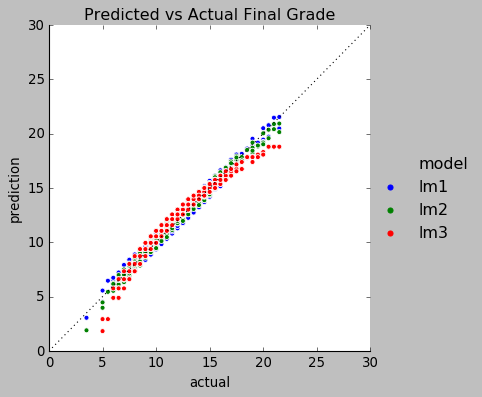

In [186]:
# the predictions are a 1 x 83 two dimensional matrix, but we want just
# a single array of predictions. We can use the .ravel method to achieve
# this.

pd.DataFrame({'actual': y_train.Revenue,
              'lm1': y_pred_lm1.ravel(),
              'lm2': y_pred_lm2.ravel(),
              'lm3': y_pred_lm3.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([0, 30], [0, 30], c='black', ls=':')
plt.ylim(0, 30)
plt.xlim(0, 30)
plt.title('Predicted vs Actual Final Grade')

,Temperature,Rainfall,Flyers,Price,Sales,Revenue
count,365.000000,365.000000,365.000000,365.0,365.000000,365.000000
mean,60.731233,0.826603,40.284932,0.5,25.323288,12.661644
std,16.196266,0.273171,13.178651,0.0,6.893589,3.446795
min,15.100000,0.470000,9.000000,0.5,7.000000,3.500000
25%,49.700000,0.650000,31.000000,0.5,20.000000,10.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000,12.500000
75%,71.300000,0.910000,49.000000,0.5,30.000000,15.000000
max,102.900000,2.500000,80.000000,0.5,43.000000,21.500000


In [ ]:
# Linear Model of Temperature, LogRainfall, and Flyers, then consider the Flyer 

## Predict final grades using testing data

In [200]:
# Make predictions using the testing set
y_pred_lm2 = lm2.predict(X_test[['Temperature', 'LogRainfall']])

In [201]:
# Evaluate the performance
mse = mean_squared_error(y_test, y_pred_lm2)

print("Mean squared error: %.2f" % mse)

Mean squared error: 0.16


In [203]:
r2 = r2_score(y_test, y_pred_lm2)

print('{:.2%} of the variance in the Revenue can be explained by the Temperature and LogRainfall'
      .format(r2))

98.13% of the variance in the Revenue can be explained by the Temperature and LogRainfall


Text(0, 0.5, 'Residuals')

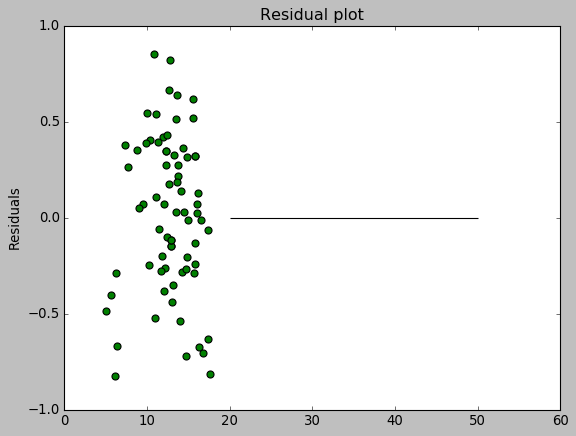

In [206]:

plt.scatter(y_pred_lm2, y_pred_lm2 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=20)
plt.title("Residual plot")
plt.ylabel('Residuals')